In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Avm_Musterileri.csv")

In [3]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.isnull().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [8]:
df.columns=["Id","Income","Score"]

In [9]:
df.head()

,Id,Income,Score
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [10]:
scaler=MinMaxScaler()
scaler.fit(df[["Income"]])
df["Income"]=scaler.transform(df[["Income"]])
scaler.fit(df[["Score"]])
df["Score"]=scaler.transform(df[["Score"]])
df.head()

,Id,Income,Score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [11]:
k_range=range(1,11)
list_dist=[]

for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(df[["Income","Score"]])
    list_dist.append(kmeans_model.inertia_)
    print(k)

C:\Users\ozkan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1
2
3
4
5
6
7
8
9
10


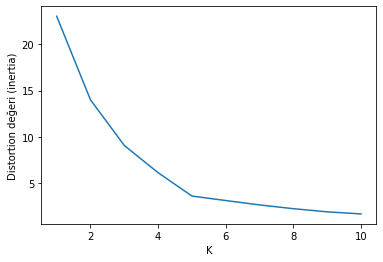

In [12]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

# k=5

In [13]:
kmeans_model_son=KMeans(n_clusters=5)
y_pred=kmeans_model_son.fit_predict(df[["Income","Score"]])

In [14]:
df["cluster"]=y_pred

In [15]:
df.head()

,Id,Income,Score,cluster
0,1,0.000000,0.387755,3
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,3
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,3


In [16]:
kmeans_model_son.cluster_centers_

array([[0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894]])

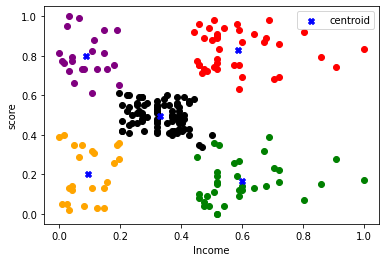

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel("Income")
plt.ylabel('score')
plt.scatter(df1["Income"],df1["Score"],color='green')
plt.scatter(df2["Income"],df2["Score"],color='red')
plt.scatter(df3["Income"],df3["Score"],color='black')
plt.scatter(df4["Income"],df4["Score"],color='orange')
plt.scatter(df5["Income"],df5["Score"],color='purple')

plt.scatter(kmeans_model_son.cluster_centers_[:,0], kmeans_model_son.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()
